# Load libraries and dataset

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [5]:
# Load the dataset

df = pd.read_csv("C:\\Users\\DELL\\Desktop\\Sanjana\\itvedant\\airline_passenger_satisfaction.csv")
df

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


### Drop unncessary Columns

In [6]:
#Column 'Unnamed: 0' is irrelevant. Therefore, dropping the column from the dataset.

df = df.drop(['Unnamed: 0'],axis=1) 
df

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


# Column Summary
Gender: Gender of the passengers (Female, Male)
    
Customer Type: The customer type (Loyal customer, disloyal customer)
    
Age: The actual age of the passengers
    
Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
    
Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
    
Flight distance: The flight distance of this journey
    
Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
    
Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
    
Ease of Online booking: Satisfaction level of online booking
    
Gate location: Satisfaction level of Gate location
    
Food and drink: Satisfaction level of Food and drink
    
Online boarding: Satisfaction level of online boarding
    
Seat comfort: Satisfaction level of Seat comfort
    
Inflight entertainment: Satisfaction level of inflight entertainment
    
On-board service: Satisfaction level of On-board service
    
Leg room service: Satisfaction level of Leg room service
    
Baggage handling: Satisfaction level of baggage handling
    
Check-in service: Satisfaction level of Check-in service
    
Inflight service: Satisfaction level of inflight service
    
Cleanliness: Satisfaction level of Cleanliness
    
Departure Delay in Minutes: Minutes delayed when departure
    
Arrival Delay in Minutes: Minutes delayed when Arrival
    
Satisfaction: Neutral/Dissatisfied or Satified

# Exploratory Data Analysis (EDA)

In [7]:
df.head(10)

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

In [9]:
df.describe()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
df.isnull().sum()

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [11]:
#As we can see null values in "Arrival_delay_in_minutes" column, we need to fill na with mean

arrival_delay_in_minutes_mean=df["arrival_delay_in_minutes"].mean()
df["arrival_delay_in_minutes"]=df["arrival_delay_in_minutes"].fillna(arrival_delay_in_minutes_mean)

In [12]:
#Now check again if null values are there after filling na with mean

df.isnull().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [13]:
#Checking for duplicates

df.duplicated().sum()

0

# Visualization

### The Distribution of Passengers who are Satisfied and Neutral/Dissatisfied

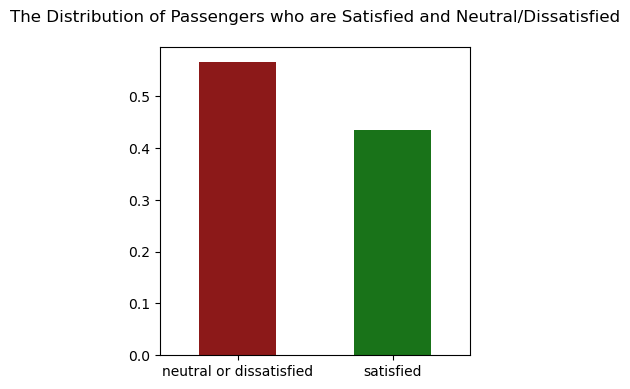

In [14]:
fig = plt.figure(figsize = (4,4))
df.satisfaction.value_counts(normalize=True).plot(kind='bar', color= ['maroon','darkgreen'], alpha = 0.9, rot=0)
plt.title('The Distribution of Passengers who are Satisfied and Neutral/Dissatisfied\n')
plt.show()

In [15]:
df.satisfaction.value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

#### As we can see above, in general, based on all the parameters, more number of passengers are neutral/dissatisfied than satisfied

#### Now using bar plot of numerical features

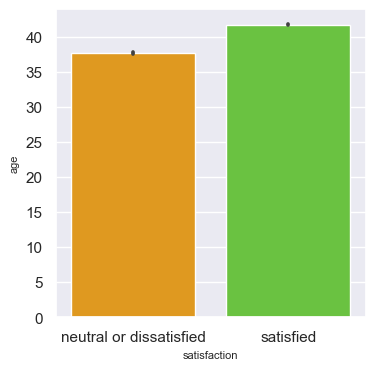

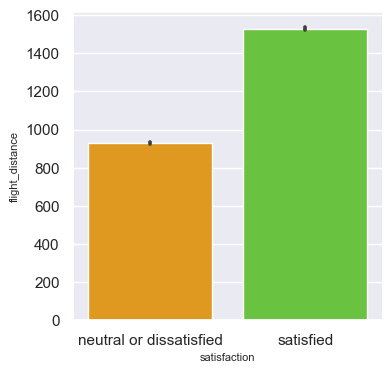

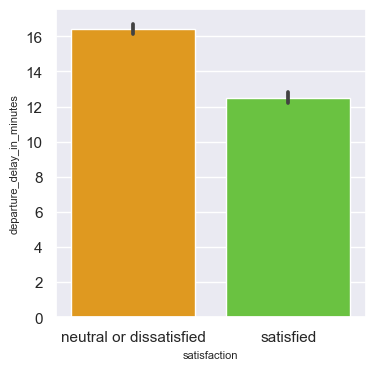

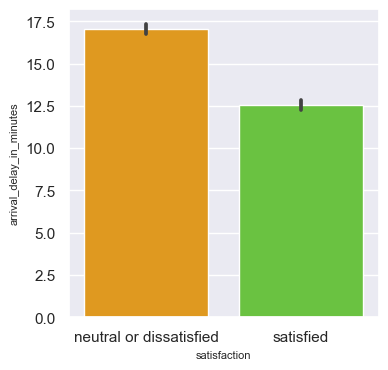

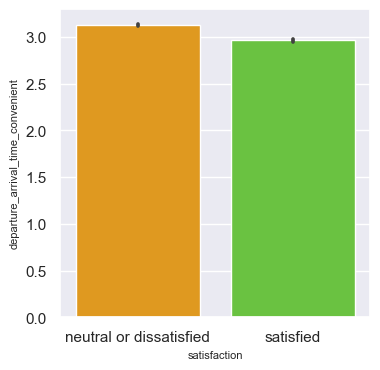

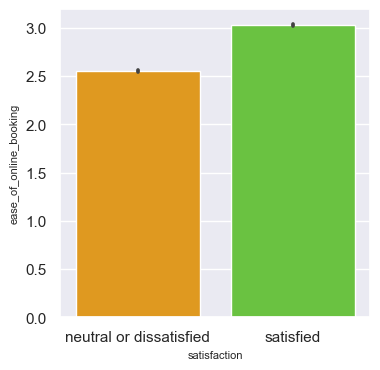

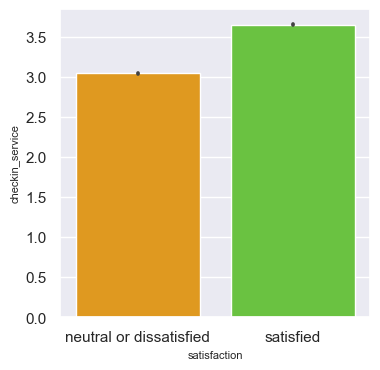

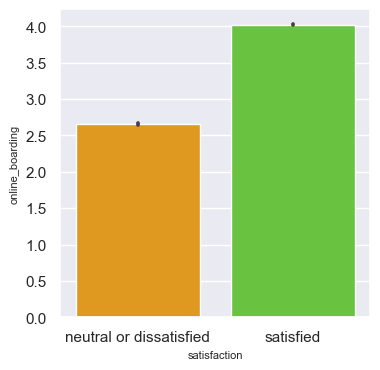

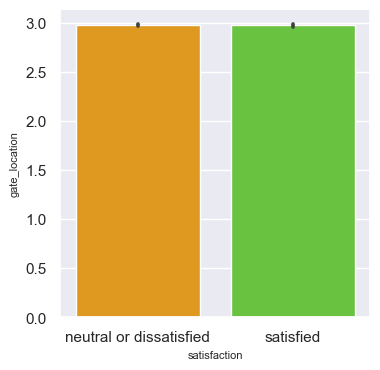

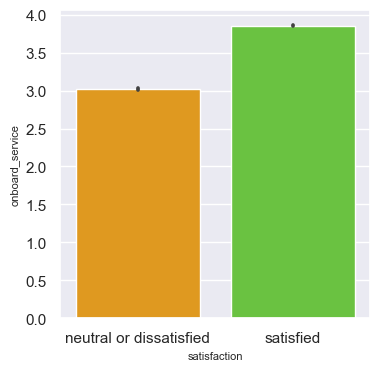

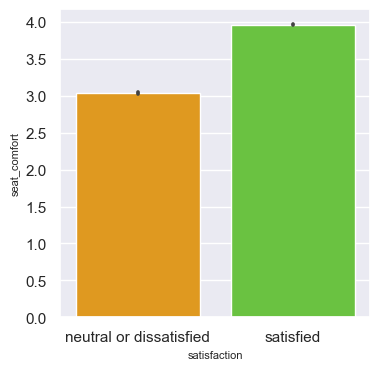

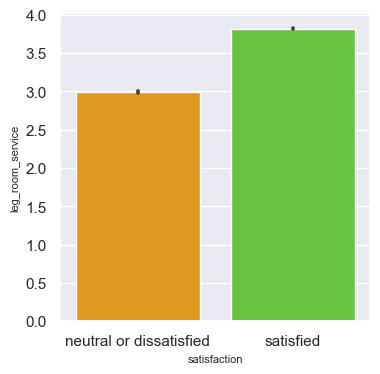

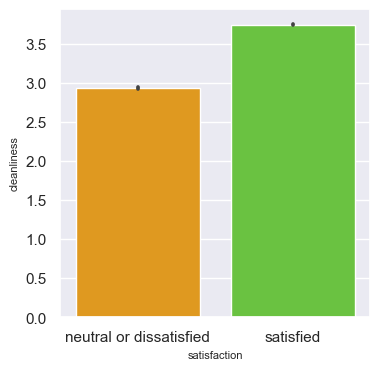

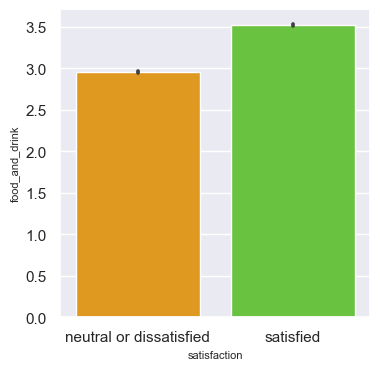

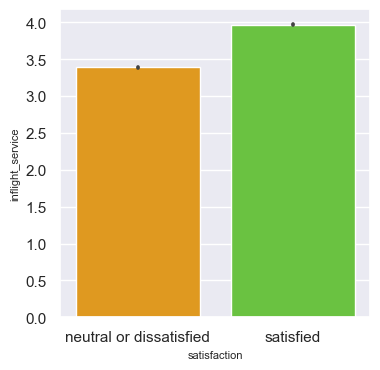

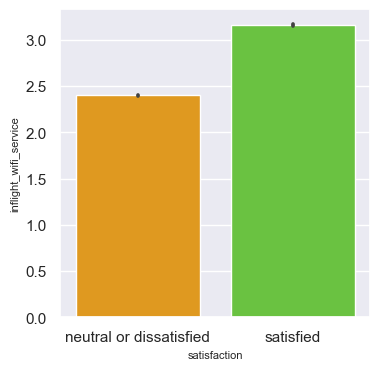

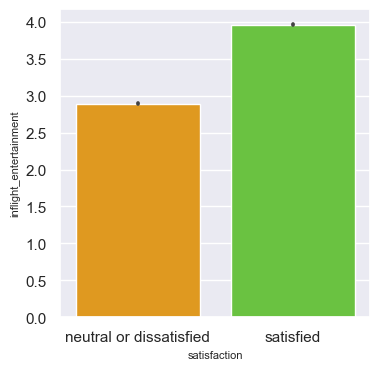

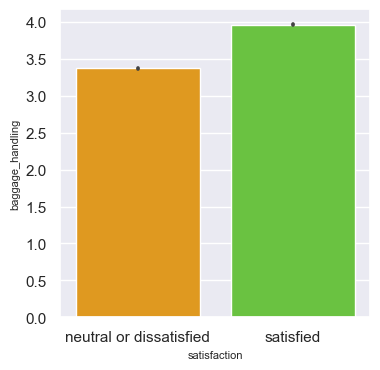

In [16]:
numerical = [df['age'], df['flight_distance'], df['departure_delay_in_minutes'], df['arrival_delay_in_minutes'], df['departure_arrival_time_convenient'],
             df['ease_of_online_booking'], df['checkin_service'], df['online_boarding'], df['gate_location'], df['onboard_service'],
             df['seat_comfort'], df['leg_room_service'], df['cleanliness'], df['food_and_drink'], df['inflight_service'], 
              df['inflight_wifi_service'],df['inflight_entertainment'], df['baggage_handling']]

sns.set(rc={'figure.figsize':(4, 4),
            "font.size":8,
            "axes.titlesize":8,
            "axes.labelsize":8},
             style="darkgrid")
        

for i in numerical:
    sns.barplot(data=df, x=df['satisfaction'], y=i, palette=['#FFA200','#62D82B'])
    plt.show()

#### From the bar plot for numerical features

1. Passengers were more satisfied under features such as age, flight distance, ease of online booking, checkin service, 
   online boarding, onboard service, seat comfort, leg room service, cleanliness, 
   food and drink, inflight services, inflight wifi service, inflight entertainment and
   baggage handling
2. Passengers were more dissatisfied under features such as departure delay, arrival delay, 
   departure and arrival time convinient 


#### Also, from the above bar plot, it is known that the location of the Gate does not play a major role in passenger satisfaction. Therefore we can ignore Gate location column.

In [17]:
df = df.drop('gate_location',axis=1)

In [18]:
df

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,food_and_drink,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,5,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,1,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,5,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,4,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,4,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,2,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,4,...,4,3,2,5,4,5,4,0,0.0,satisfied


#### Now using count plot of Categorical features

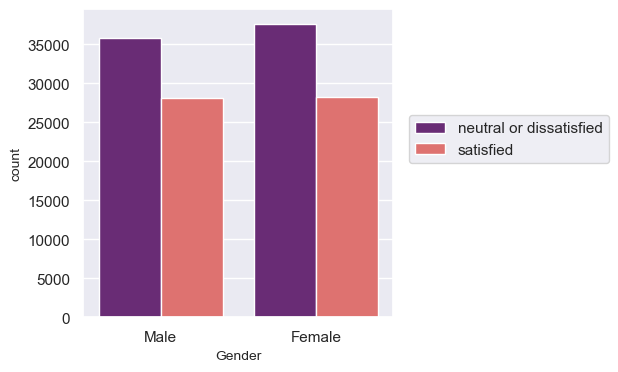

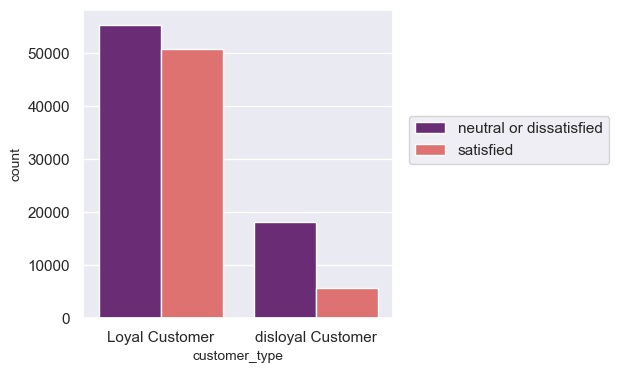

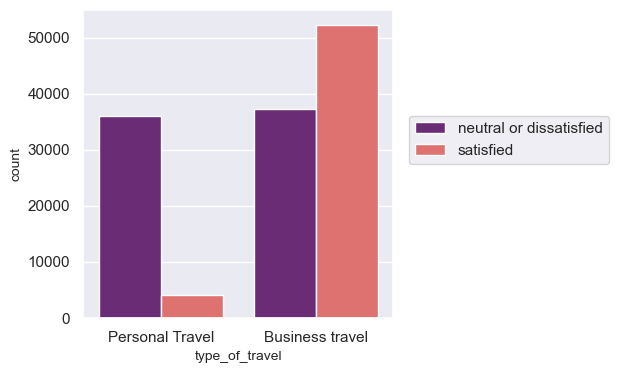

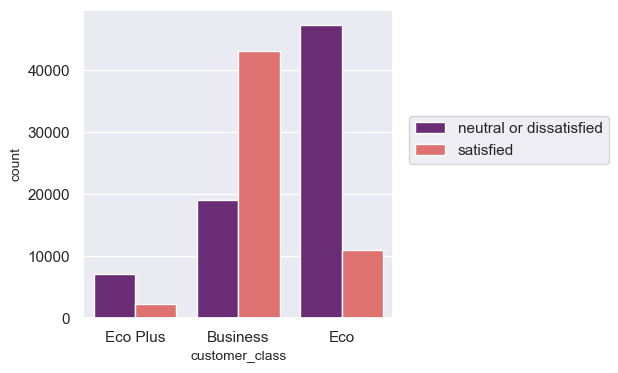

In [19]:
categorical = [df['Gender'], df['customer_type'], df['type_of_travel'], df['customer_class'], df['satisfaction']]

sns.set(rc={'figure.figsize':(4, 4),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

for col in categorical[:-1]:
    plt.figure(figsize=(4, 4)) 
    sns.countplot(data=df, x=col, hue ='satisfaction', palette='magma')
    plt.legend(loc=(1.05, 0.5))

#### From the above count plot for categorical values:

1. Gender does not play a significant role in satisfaction, as men and women seem to be concerned about the same factors.
2. The number of loyal customers for the airline is high, but the dissatisfaction rate is high regardless of loyalty. Airlines must pay attention to retaining loyal customers.
3. Travelers with business travel intentions appear to be more satisfied with flights, than travelers with personal travel intentions.
4. Passengers in business class seem to be the most satisfied, while passengers in economy class are the most dissatisfied.

### Using heatmap visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_13144\2618243022.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)


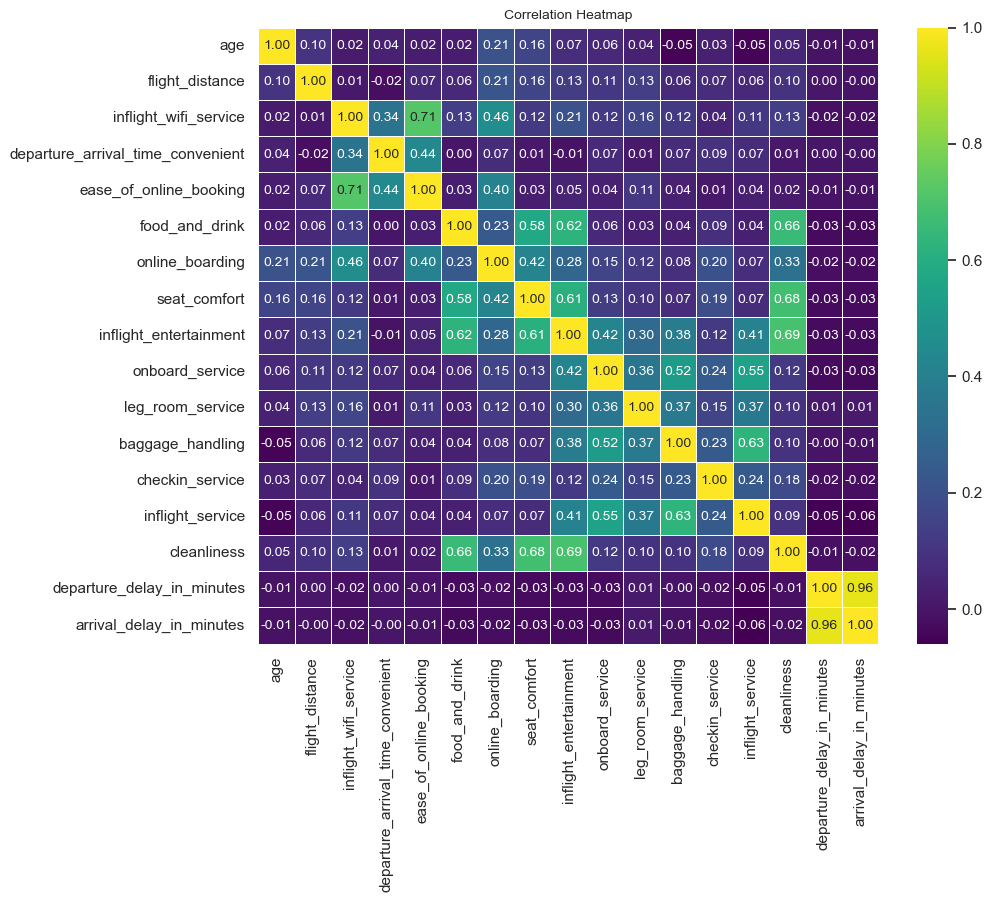

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Check if Dependent variable is balanced or not

In [21]:
target = df['satisfaction'].value_counts().reset_index()
target.rename(columns={'index':'satisfaction','satisfaction':'count'}, inplace=True)
target['percentage'] = round((target['count']/target['count'].sum())*100,2)
target

,satisfaction,count,percentage
0,neutral or dissatisfied,73452,56.55
1,satisfied,56428,43.45


As we can see above, percentage of dissatisfied to satisfied 56.55: 43.45. Even though ratio is out of balance, but the numbers are still tolerable. Therefore it does not require Imbalanced Data handling to overcome this.

Text(0.5, 1.0, 'Percentage of Satisfaction')

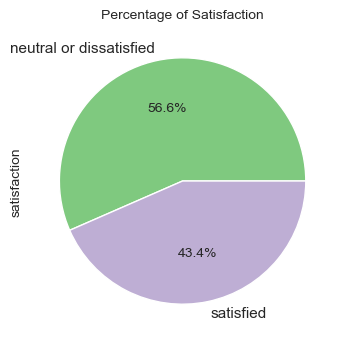

In [22]:
fig = plt.figure(figsize=(4,4))
ax1 = plt.subplot(111)
df['satisfaction'].value_counts().plot.pie(colors = sns.color_palette("Accent"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of Satisfaction')

## Using Label Encoder for converting categorical features into numerical features

In [23]:
df_categorical = df.select_dtypes(['object'])
df_categorical

,Gender,customer_type,type_of_travel,customer_class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
129875,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
129876,Male,Loyal Customer,Business travel,Business,satisfied
129877,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
129878,Male,Loyal Customer,Business travel,Business,satisfied


In [24]:
import sklearn
from sklearn.preprocessing import LabelEncoder

le = sklearn.preprocessing.LabelEncoder()

for i in df_categorical:
    df[i] = le.fit_transform(df[i])
df

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,food_and_drink,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,5,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,1,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,5,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,2,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,4,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,34,0,0,526,3,3,3,4,...,4,3,2,4,4,5,4,0,0.0,0
129876,1,0,23,0,0,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129877,0,0,17,1,1,828,2,5,1,2,...,2,4,3,4,5,4,2,0,0.0,0
129878,1,0,14,0,0,1127,3,3,3,4,...,4,3,2,5,4,5,4,0,0.0,1


In [25]:
df.dtypes

Gender                                 int32
customer_type                          int32
age                                    int64
type_of_travel                         int32
customer_class                         int32
flight_distance                        int64
inflight_wifi_service                  int64
departure_arrival_time_convenient      int64
ease_of_online_booking                 int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
satisfaction                           int32
dtype: obj

In [26]:
df.isnull().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

Now, we can see all categorical features have been converted to numerical features

## Split the dataset into X and Y

In [27]:
x=df.drop('satisfaction',axis=1)
x

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,food_and_drink,...,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,1,0,13,1,2,460,3,4,3,5,...,5,5,4,3,4,4,5,5,25,18.0
1,1,1,25,0,0,235,3,2,3,1,...,1,1,1,5,3,1,4,1,1,6.0
2,0,0,26,0,0,1142,2,2,2,5,...,5,5,4,3,4,4,4,5,0,0.0
3,0,0,25,0,0,562,2,5,5,2,...,2,2,2,5,3,1,4,2,11,9.0
4,1,0,61,0,0,214,3,3,3,4,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,34,0,0,526,3,3,3,4,...,4,4,3,2,4,4,5,4,0,0.0
129876,1,0,23,0,0,646,4,4,4,4,...,4,4,4,5,5,5,5,4,0,0.0
129877,0,0,17,1,1,828,2,5,1,2,...,2,2,4,3,4,5,4,2,0,0.0
129878,1,0,14,0,0,1127,3,3,3,4,...,4,4,3,2,5,4,5,4,0,0.0


In [28]:
y = df['satisfaction']
y

0         0
1         0
2         1
3         0
4         1
         ..
129875    0
129876    1
129877    0
129878    1
129879    0
Name: satisfaction, Length: 129880, dtype: int32

In [29]:
df.isnull().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)

## Feature Scaling

In [31]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print('X_train: ',x_train)
print('X_test: ',x_test)

X_train:  [[-0.98623577 -0.47483775  1.62649954 ...  1.3056862  -0.09824202
  -0.28874091]
 [ 1.01395633  2.10598253 -0.88620297 ... -0.21881382  2.55208965
   2.8581419 ]
 [-0.98623577 -0.47483775 -2.07643047 ...  0.54343619 -0.38689201
  -0.39277009]
 ...
 [-0.98623577 -0.47483775 -0.15884172 ...  1.3056862  -0.38689201
  -0.39277009]
 [-0.98623577 -0.47483775 -1.67968797 ...  0.54343619 -0.38689201
  -0.39277009]
 [ 1.01395633 -0.47483775 -0.35721297 ... -0.98106383 -0.38689201
  -0.39277009]]
X_test:  [[ 1.01857407 -0.46774636  1.75251478 ...  0.54259374 -0.38483534
  -0.39354777]
 [-0.98176463 -0.46774636 -0.10136965 ...  0.54259374 -0.30572254
  -0.39354777]
 [-0.98176463 -0.46774636 -0.10136965 ... -0.97171354 -0.38483534
  -0.39354777]
 ...
 [ 1.01857407 -0.46774636 -0.76347123 ...  0.54259374 -0.33209347
  -0.39354777]
 [ 1.01857407 -0.46774636 -0.63105092 ...  1.29974739  1.98854875
   2.14354166]
 [-0.98176463 -0.46774636  1.28904368 ... -0.2145599  -0.14749693
  -0.39354777

In [32]:
x_train = pd.DataFrame(x_train,columns=x.columns)
x_test = pd.DataFrame(x_test,columns=x.columns)
x_train

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,food_and_drink,...,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,-0.986236,-0.474838,1.626500,1.492828,-0.957062,-0.224186,0.206148,1.271199,0.174602,1.351802,...,1.182388,-1.766908,-1.850069,-0.267017,-2.232966,1.339067,-2.249827,1.305686,-0.098242,-0.288741
1,1.013956,2.105983,-0.886203,-0.669869,-0.957062,-0.598714,-0.545787,-1.349410,-1.250971,-0.153268,...,-0.333637,-0.267887,1.254828,0.493055,1.158966,0.548926,0.301870,-0.218814,2.552090,2.858142
2,-0.986236,-0.474838,-2.076430,1.492828,0.652198,-0.196071,0.206148,0.616046,0.174602,0.599267,...,0.424376,0.481623,0.478603,1.253128,1.158966,0.548926,0.301870,0.543436,-0.386892,-0.392770
3,1.013956,-0.474838,0.105653,-0.669869,-0.957062,1.038969,0.958084,0.616046,0.887389,-1.658337,...,0.424376,1.231133,1.254828,1.253128,1.158966,1.339067,1.152435,-1.743314,-0.150724,-0.288741
4,-0.986236,2.105983,-1.349069,-0.669869,0.652198,0.046920,0.958084,0.616046,0.887389,-0.153268,...,-0.333637,-0.267887,-1.850069,-1.027090,0.310983,-1.821499,0.301870,-0.218814,-0.386892,-0.392770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-0.986236,-0.474838,-0.092718,-0.669869,0.652198,-0.282424,0.958084,0.616046,0.887389,0.599267,...,0.424376,0.481623,-1.073845,1.253128,-2.232966,-1.031357,0.301870,0.543436,-0.386892,-0.392770
103900,1.013956,-0.474838,0.436272,-0.669869,0.652198,0.008765,-1.297723,-0.694258,-0.538185,-1.658337,...,-1.849662,0.481623,-0.297621,-0.267017,-0.537000,-1.821499,-2.249827,-1.743314,6.435744,6.447149
103901,-0.986236,-0.474838,-0.158842,-0.669869,0.652198,-0.871829,1.710020,1.271199,1.600175,1.351802,...,1.182388,1.231133,-1.850069,-1.027090,0.310983,-1.821499,-0.548696,1.305686,-0.386892,-0.392770
103902,-0.986236,-0.474838,-1.679688,1.492828,0.652198,-0.840702,0.958084,1.271199,0.887389,0.599267,...,0.424376,0.481623,-0.297621,1.253128,1.158966,0.548926,0.301870,0.543436,-0.386892,-0.392770


## Model Evaluation

### For model evaluation, we will be going for Supervised Learning methods: 

1. Logistic Regression (Since this dataset is a classification model)
2. K-Nearest Neighbour
3. Decision Tree
4. Random Forest

In [33]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_train_pred_log = model.predict(x_train)
    print('Training Model :')
    print(classification_report(y_train, y_train_pred_log))
    y_test_pred_log = model.predict(x_test)
    print('Testing Model :')
    print(classification_report(y_test, y_test_pred_log))

### 1. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
mymodel(logreg_model)



Training Model :
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     58830
           1       0.87      0.83      0.85     45074

    accuracy                           0.87    103904
   macro avg       0.87      0.87      0.87    103904
weighted avg       0.87      0.87      0.87    103904

Testing Model :
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     14622
           1       0.87      0.84      0.86     11354

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.88      0.88      0.88     25976



### Hyperparameter Tuning using GridSearchCV

In [33]:
parameters={'solver':['poly','liblinear','lbfgs','saga','sag','newton-cg'],'penalty':['none','l1','l2','elasticnet'],'C':[100,10,1,0.1,0.01]}
gslog = GridSearchCV(logreg_model,parameters,verbose=3)

In [34]:
gslog.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 2/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 3/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 4/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 5/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 1/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END .C=100, penalty=none, solver=lbfgs;, score=0.871 total time=   0.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END .C=100, penalty=none, solver=lbfgs;, score=0.874 total time=   0.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END .C=100, penalty=none, solver=lbfgs;, score=0.874 total time=   0.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END .C=100, penalty=none, solver=lbfgs;, score=0.876 total time=   0.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END .C=100, penalty=none, solver=lbfgs;, score=0.876 total time=   0.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ..C=100, penalty=none, solver=saga;, score=0.871 total time=   1.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ..C=100, penalty=none, solver=saga;, score=0.874 total time=   1.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ..C=100, penalty=none, solver=saga;, score=0.874 total time=   1.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ..C=100, penalty=none, solver=saga;, score=0.876 total time=   1.0s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ..C=100, penalty=none, solver=saga;, score=0.876 total time=   1.7s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ...C=100, penalty=none, solver=sag;, score=0.871 total time=   1.0s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ...C=100, penalty=none, solver=sag;, score=0.874 total time=   1.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ...C=100, penalty=none, solver=sag;, score=0.874 total time=   1.0s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ...C=100, penalty=none, solver=sag;, score=0.876 total time=   1.4s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ...C=100, penalty=none, solver=sag;, score=0.876 total time=   1.7s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=100, penalty=none, solver=newton-cg;, score=0.871 total time=   1.3s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=100, penalty=none, solver=newton-cg;, score=0.874 total time=   1.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=100, penalty=none, solver=newton-cg;, score=0.874 total time=   0.8s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=100, penalty=none, solver=newton-cg;, score=0.876 total time=   0.8s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=100, penalty=none, solver=newton-cg;, score=0.876 total time=   0.9s
[CV 1/5] END ......C=100, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 2/5] END ......C=100, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 3/5] END ......C=100, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 4/5] END ......C=100, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 5/5] END ......C=100, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 1/5] END C=100, penalty=l1, solver=liblinear;, score=0.871 total time=   0.7s
[CV 2/5] END C=100, penalty=l1, solver=liblinear;, score=0.874 total time=   0.6s
[CV 3/5] END C=100, penalty=l1, solver=liblinear;, score=0.874 total time=   0.8s
[CV 4/5] END C=100, penalty=l1, solver=liblinear;, score=0.876 total time=   0.8s
[CV 5/5] END C=100, penalty=l1, solver=liblinear;, score=0.876 total time=   0.6s
[CV 1/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ..C=10, penalty=none, solver=lbfgs;, score=0.871 total time=   0.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ..C=10, penalty=none, solver=lbfgs;, score=0.874 total time=   0.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ..C=10, penalty=none, solver=lbfgs;, score=0.874 total time=   0.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ..C=10, penalty=none, solver=lbfgs;, score=0.876 total time=   0.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ..C=10, penalty=none, solver=lbfgs;, score=0.876 total time=   0.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ...C=10, penalty=none, solver=saga;, score=0.871 total time=   1.6s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ...C=10, penalty=none, solver=saga;, score=0.874 total time=   1.4s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ...C=10, penalty=none, solver=saga;, score=0.874 total time=   1.5s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ...C=10, penalty=none, solver=saga;, score=0.876 total time=   1.0s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ...C=10, penalty=none, solver=saga;, score=0.876 total time=   1.6s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ....C=10, penalty=none, solver=sag;, score=0.871 total time=   0.8s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ....C=10, penalty=none, solver=sag;, score=0.874 total time=   0.9s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ....C=10, penalty=none, solver=sag;, score=0.874 total time=   0.9s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ....C=10, penalty=none, solver=sag;, score=0.875 total time=   0.8s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ....C=10, penalty=none, solver=sag;, score=0.876 total time=   1.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=10, penalty=none, solver=newton-cg;, score=0.871 total time=   0.8s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=10, penalty=none, solver=newton-cg;, score=0.874 total time=   1.4s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=10, penalty=none, solver=newton-cg;, score=0.874 total time=   1.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=10, penalty=none, solver=newton-cg;, score=0.876 total time=   1.3s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=10, penalty=none, solver=newton-cg;, score=0.876 total time=   1.1s
[CV 1/5] END .......C=10, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 2/5] END .......C=10, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 3/5] END .......C=10, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 4/5] END .......C=10, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 5/5] END .......C=10, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 1/5] END C=10, penalty=l1, solver=liblinear;, score=0.871 total time=   0.8s
[CV 2/5] END C=10, penalty=l1, solver=liblinear;, score=0.874 total time=   1.3s
[CV 3/5] END C=10, penalty=l1, solver=liblinear;, score=0.874 total time=   2.4s
[CV 4/5] END C=10, penalty=l1, solver=liblinear;, score=0.876 total time=   3.6s
[CV 5/5] END C=10, penalty=l1, solver=liblinear;, score=0.876 total time=   2.6s
[CV 1/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ......C=10, p

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END ...C=1, penalty=none, solver=lbfgs;, score=0.871 total time=   0.3s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END ...C=1, penalty=none, solver=lbfgs;, score=0.874 total time=   0.3s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END ...C=1, penalty=none, solver=lbfgs;, score=0.874 total time=   0.3s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 4/5] END ...C=1, penalty=none, solver=lbfgs;, score=0.876 total time=   0.3s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END ...C=1, penalty=none, solver=lbfgs;, score=0.876 total time=   0.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END ....C=1, penalty=none, solver=saga;, score=0.871 total time=   2.7s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END ....C=1, penalty=none, solver=saga;, score=0.874 total time=   2.6s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END ....C=1, penalty=none, solver=saga;, score=0.874 total time=   2.9s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 4/5] END ....C=1, penalty=none, solver=saga;, score=0.876 total time=   1.9s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END ....C=1, penalty=none, solver=saga;, score=0.876 total time=   1.6s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END .....C=1, penalty=none, solver=sag;, score=0.871 total time=   1.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END .....C=1, penalty=none, solver=sag;, score=0.874 total time=   1.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END .....C=1, penalty=none, solver=sag;, score=0.874 total time=   1.3s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 4/5] END .....C=1, penalty=none, solver=sag;, score=0.876 total time=   1.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END .....C=1, penalty=none, solver=sag;, score=0.876 total time=   0.9s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, penalty=none, solver=newton-cg;, score=0.871 total time=   0.8s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, penalty=none, solver=newton-cg;, score=0.874 total time=   1.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, penalty=none, solver=newton-cg;, score=0.874 total time=   1.0s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 4/5] END C=1, penalty=none, solver=newton-cg;, score=0.876 total time=   0.9s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, penalty=none, solver=newton-cg;, score=0.876 total time=   1.1s
[CV 1/5] END ........C=1, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 2/5] END ........C=1, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 3/5] END ........C=1, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 4/5] END ........C=1, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 5/5] END ........C=1, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.871 total time=   0.8s
[CV 2/5] END .C=1, penalty=l1, solver=liblinear;, score=0.874 total time=   1.0s
[CV 3/5] END .C=1, penalty=l1, solver=liblinear;, score=0.874 total time=   0.8s
[CV 4/5] END .C=1, penalty=l1, solver=liblinear;, score=0.876 total time=   0.6s
[CV 5/5] END .C=1, penalty=l1, solver=liblinear;, score=0.876 total time=   0.9s
[CV 1/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .......C=1, pe

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.871 total time=   0.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.874 total time=   0.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.874 total time=   0.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.876 total time=   0.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.876 total time=   0.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ..C=0.1, penalty=none, solver=saga;, score=0.871 total time=   1.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ..C=0.1, penalty=none, solver=saga;, score=0.874 total time=   1.0s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ..C=0.1, penalty=none, solver=saga;, score=0.874 total time=   1.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ..C=0.1, penalty=none, solver=saga;, score=0.876 total time=   1.0s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ..C=0.1, penalty=none, solver=saga;, score=0.876 total time=   1.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ...C=0.1, penalty=none, solver=sag;, score=0.871 total time=   0.8s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ...C=0.1, penalty=none, solver=sag;, score=0.874 total time=   0.7s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ...C=0.1, penalty=none, solver=sag;, score=0.874 total time=   0.8s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ...C=0.1, penalty=none, solver=sag;, score=0.876 total time=   0.8s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ...C=0.1, penalty=none, solver=sag;, score=0.876 total time=   0.8s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.1, penalty=none, solver=newton-cg;, score=0.871 total time=   0.7s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, penalty=none, solver=newton-cg;, score=0.874 total time=   0.7s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, penalty=none, solver=newton-cg;, score=0.874 total time=   0.8s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, penalty=none, solver=newton-cg;, score=0.876 total time=   1.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, penalty=none, solver=newton-cg;, score=0.876 total time=   1.0s
[CV 1/5] END ......C=0.1, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 2/5] END ......C=0.1, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 3/5] END ......C=0.1, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 4/5] END ......C=0.1, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 5/5] END ......C=0.1, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.871 total time=   0.6s
[CV 2/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.873 total time=   0.4s
[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.874 total time=   0.4s
[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.875 total time=   0.5s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.876 total time=   0.5s
[CV 1/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.01, penalty=none, solver=lbfgs;, score=0.871 total time=   0.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.01, penalty=none, solver=lbfgs;, score=0.874 total time=   0.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.01, penalty=none, solver=lbfgs;, score=0.874 total time=   0.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.01, penalty=none, solver=lbfgs;, score=0.876 total time=   0.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.01, penalty=none, solver=lbfgs;, score=0.876 total time=   0.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END .C=0.01, penalty=none, solver=saga;, score=0.871 total time=   1.1s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END .C=0.01, penalty=none, solver=saga;, score=0.874 total time=   1.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END .C=0.01, penalty=none, solver=saga;, score=0.874 total time=   1.5s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END .C=0.01, penalty=none, solver=saga;, score=0.876 total time=   1.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END .C=0.01, penalty=none, solver=saga;, score=0.876 total time=   1.5s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ..C=0.01, penalty=none, solver=sag;, score=0.871 total time=   1.2s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ..C=0.01, penalty=none, solver=sag;, score=0.874 total time=   1.0s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ..C=0.01, penalty=none, solver=sag;, score=0.874 total time=   0.8s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ..C=0.01, penalty=none, solver=sag;, score=0.875 total time=   0.9s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ..C=0.01, penalty=none, solver=sag;, score=0.876 total time=   0.9s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.01, penalty=none, solver=newton-cg;, score=0.871 total time=   0.8s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.01, penalty=none, solver=newton-cg;, score=0.874 total time=   0.9s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.01, penalty=none, solver=newton-cg;, score=0.874 total time=   0.8s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.01, penalty=none, solver=newton-cg;, score=0.876 total time=   0.7s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.01, penalty=none, solver=newton-cg;, score=0.876 total time=   0.9s
[CV 1/5] END .....C=0.01, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.01, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 3/5] END .....C=0.01, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 4/5] END .....C=0.01, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 5/5] END .....C=0.01, penalty=l1, solver=poly;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.870 total time=   0.3s
[CV 2/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.874 total time=   0.3s
[CV 3/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.874 total time=   0.3s
[CV 4/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.875 total time=   0.3s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.876 total time=   0.3s
[CV 1/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
325 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\lib\site-pa

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['poly', 'liblinear', 'lbfgs', 'saga', 'sag',
                                    'newton-cg']},
             verbose=3)

In [35]:
gslog.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [36]:
log_reg_hypertuned = LogisticRegression(C=0.01,penalty='l1',solver='saga')
mymodel(log_reg_hypertuned)


Training Model :
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     58830
           1       0.87      0.83      0.85     45074

    accuracy                           0.87    103904
   macro avg       0.87      0.87      0.87    103904
weighted avg       0.87      0.87      0.87    103904

Testing Model :
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     14622
           1       0.88      0.84      0.86     11354

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.88      0.88      0.88     25976



In [37]:
acc_log_train=round(logreg_model.score(x_train,y_train)*100,2)
acc_log_test=round(logreg_model.score(x_test,y_test)*100,2)
print("Training Accuracy:  {} %".format(acc_log_train))
print("Test Accuracy:  {} %".format(acc_log_test))

Training Accuracy:  87.42 %
Test Accuracy:  87.66 %


In [38]:
log_hypertuned_train = round(log_reg_hypertuned.score(x_train,y_train)*100,2)
log_hypertuned_test = round(log_reg_hypertuned.score(x_test,y_test)*100,2)
print("Hypertuned Training Accuracy:  {} %".format(log_hypertuned_train))
print("Hypertuned Test Accuracy:  {} %".format(log_hypertuned_test))

Hypertuned Training Accuracy:  87.42 %
Hypertuned Test Accuracy:  87.68 %


In [ ]:
# ROC scores


#best_model = gslog.best_estimator_
y_test_prob_log = log_reg_hypertuned.predict(x_test)
roc_auc_score = roc_auc_score(y_test, y_test_prob_log)

print('ROC AUC LOG score:', roc_auc_score)

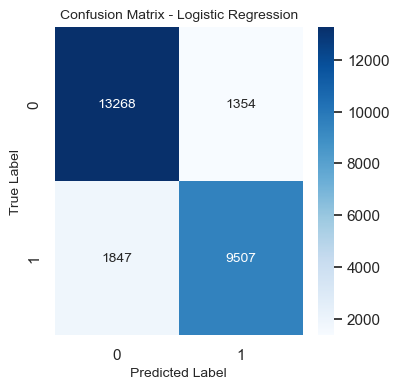

In [40]:
# Display confusion matrix
Log_cm = confusion_matrix(y_test, y_test_prob_log)

# Plot the confusion matrix
sns.heatmap(Log_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 2.Support Vector Machine

In [35]:
from sklearn.svm import SVC

model_svm = SVC()
mymodel(model_svm)

Training Model :
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     58830
           1       0.96      0.94      0.95     45074

    accuracy                           0.96    103904
   macro avg       0.96      0.96      0.96    103904
weighted avg       0.96      0.96      0.96    103904

Testing Model :
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14622
           1       0.96      0.93      0.95     11354

    accuracy                           0.95     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



### Hyperparameter Tuning using GridSearchCV

In [36]:
parameters=[
            {'C': [1, 10, 100,1000], 'kernel':['linear']},
           {'C': [1, 10, 100,1000], 'gamma':[0.001,0.0001], 'kernel':['rbf']}
           ]
gssvm = RandomizedSearchCV(model_svm,parameters,n_iter=5,cv=5,n_jobs=1,verbose=5)

In [37]:
gssvm.fit(x_train.head(4000),y_train.head(4000))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.864 total time=   1.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.839 total time=   1.8s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.860 total time=   1.8s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.846 total time=   1.4s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.863 total time=   1.2s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.934 total time=   0.8s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.920 total time=   0.8s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.935 total time=   0.8s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.926 total time=   0.8s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.943 total time=   0.7s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.907 total time=   0.5s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;,

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5, n_jobs=1,
                   param_distributions=[{'C': [1, 10, 100, 1000],
                                         'kernel': ['linear']},
                                        {'C': [1, 10, 100, 1000],
                                         'gamma': [0.001, 0.0001],
                                         'kernel': ['rbf']}],
                   verbose=5)

In [38]:
gssvm.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}

In [39]:
svm_hypertuned = SVC(kernel='rbf',gamma=0.001,C=1000)
mymodel(svm_hypertuned)

Training Model :
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     58830
           1       0.95      0.92      0.94     45074

    accuracy                           0.95    103904
   macro avg       0.95      0.94      0.94    103904
weighted avg       0.95      0.95      0.95    103904

Testing Model :
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14622
           1       0.95      0.92      0.93     11354

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [40]:
acc_svm_train=round(model_svm.score(x_train,y_train)*100,2)
acc_svm_test=round(model_svm.score(x_test,y_test)*100,2)
print("Training Accuracy:  {} %".format(acc_svm_train))
print("Test Accuracy:  {} %".format(acc_svm_test))

Training Accuracy:  95.88 %
Test Accuracy:  95.4 %


In [41]:
svm_hypertuned_train = round(svm_hypertuned.score(x_train,y_train)*100,2)
svm_hypertuned_test = round(svm_hypertuned.score(x_test,y_test)*100,2)
print("Hypertuned Training Accuracy:  {} %".format(svm_hypertuned_train))
print("Hypertuned Test Accuracy:  {} %".format(svm_hypertuned_test))

Hypertuned Training Accuracy:  94.52 %
Hypertuned Test Accuracy:  94.27 %


In [42]:
# ROC scores

y_test_prob_svm = svm_hypertuned.predict(x_test)
roc_auc_svm = roc_auc_score(y_test, y_test_prob_svm)
print('ROC AUC SVM score:', roc_auc_svm)


ROC AUC SVM score: 0.9396349693926307


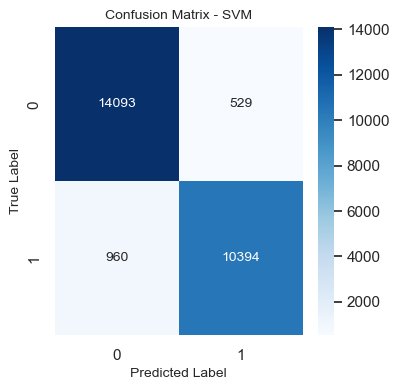

In [43]:
# Display confusion matrix
svm_cm = confusion_matrix(y_test, y_test_prob_svm)

# Plot the confusion matrix
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 3. Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=9,min_samples_leaf=6,min_samples_split=6)
mymodel(dtc)

Training Model :
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     58830
           1       0.96      0.91      0.93     45074

    accuracy                           0.94    103904
   macro avg       0.95      0.94      0.94    103904
weighted avg       0.94      0.94      0.94    103904

Testing Model :
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14622
           1       0.96      0.90      0.93     11354

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



### Hyperparameter Tuning using GridSearchCV

In [46]:

parameters={'max_depth': [7,8,9],
    'min_samples_leaf': [1,5,6],
    'min_samples_split': [2,5,6]}
gsdtc = GridSearchCV(dtc,parameters,verbose=3)

In [47]:
gsdtc.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=0.928 total time=   0.3s
[CV 2/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=0.928 total time=   0.2s
[CV 3/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=0.927 total time=   0.3s
[CV 4/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=0.927 total time=   0.4s
[CV 5/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=0.931 total time=   0.4s
[CV 1/5] END max_depth=7, min_samples_leaf=1, min_samples_split=5;, score=0.928 total time=   0.4s
[CV 2/5] END max_depth=7, min_samples_leaf=1, min_samples_split=5;, score=0.928 total time=   0.3s
[CV 3/5] END max_depth=7, min_samples_leaf=1, min_samples_split=5;, score=0.927 total time=   0.3s
[CV 4/5] END max_depth=7, min_samples_leaf=1, min_samples_split=5;, score=0.927 total time=   0.2s
[CV 5/5] END max_depth=7, min_samples_leaf=1, m

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=9, min_samples_leaf=6,
                                              min_samples_split=6),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [1, 5, 6],
                         'min_samples_split': [2, 5, 6]},
             verbose=3)

In [48]:
gsdtc.best_params_

{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 6}

In [50]:
dtc_hypertuned = DecisionTreeClassifier(max_depth=9,min_samples_leaf=5,min_samples_split=6)
mymodel(dtc_hypertuned)

Training Model :
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     58830
           1       0.96      0.91      0.93     45074

    accuracy                           0.94    103904
   macro avg       0.95      0.94      0.94    103904
weighted avg       0.94      0.94      0.94    103904

Testing Model :
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14622
           1       0.96      0.90      0.93     11354

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [52]:
acc_dtc_train=round(dtc.score(x_train,y_train)*100,2)
acc_dtc_test=round(dtc.score(x_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_dtc_train))
print("Test Accuracy:  {} %".format(acc_dtc_test))

Training Accuracy: 94.4 %
Test Accuracy:  94.04 %


In [54]:
hypertuned_dtc_train=round(dtc_hypertuned.score(x_train,y_train)*100,2)
hypertuned_dtc_test=round(dtc_hypertuned.score(x_test,y_test)*100,2)
print("Hypertuned Training Accuracy: {} %".format(hypertuned_dtc_train))
print("Hypertuned Test Accuracy:  {} %".format(hypertuned_dtc_test))

Hypertuned Training Accuracy: 94.41 %
Hypertuned Test Accuracy:  94.06 %


In [55]:
# ROC scores

y_test_prob_dtc = dtc_hypertuned.predict(x_test)
roc_auc_score = roc_auc_score(y_test, y_test_prob_dtc)

print('ROC AUC Decision Tree score:', roc_auc_score)

ROC AUC Decision Tree score: 0.9364990961110841


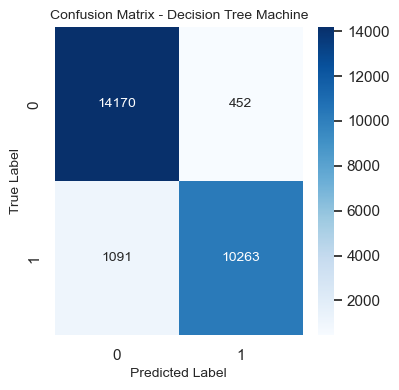

In [56]:
# Display confusion matrix
dct_cm = confusion_matrix(y_test, y_test_prob_dtc)

# Plot the confusion matrix
sns.heatmap(dct_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [42]:
from sklearn import tree


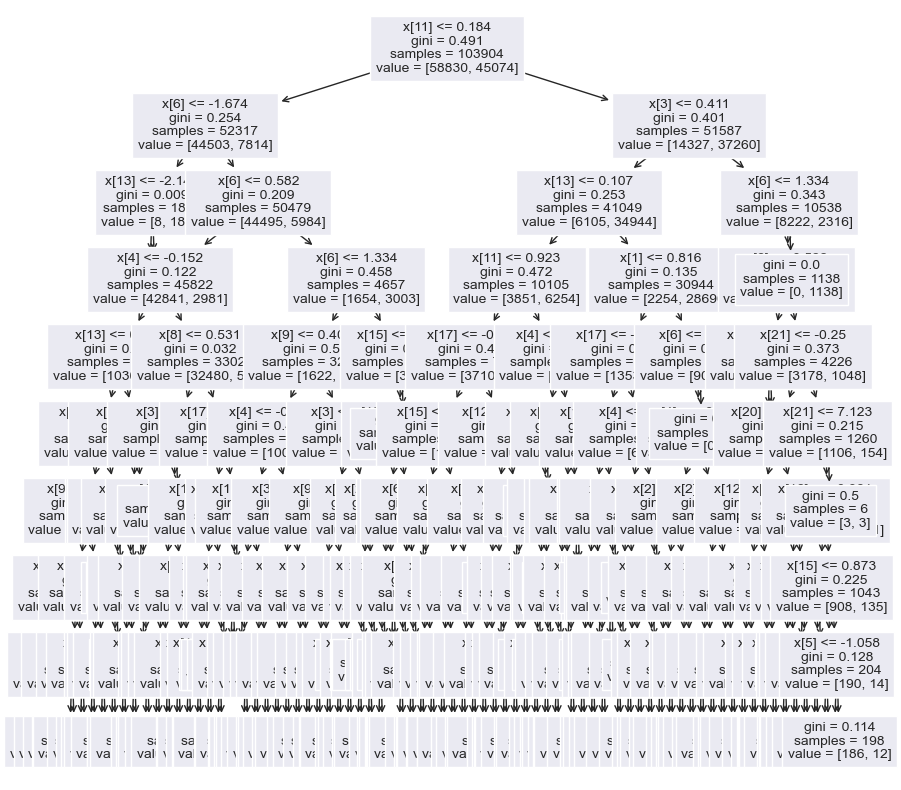

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dtc, fontsize=10)
plt.show()

### 4. Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# train the model
rf.fit(x_train, y_train)
print(rf)

RandomForestClassifier()


In [176]:
# predict train data
y_train_pred_rf = rf.predict(x_train)

# print classification report
print('Training Model (Random Forest):')
print(classification_report(y_train, y_train_pred_rf))

Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58830
           1       1.00      1.00      1.00     45074

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904



In [177]:
# predict test data
y_test_pred_rf = rf.predict(x_test)


# print classification report
print('Testing Model (Random Forest):')
print(classification_report(y_test, y_test_pred_rf))

Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14622
           1       0.98      0.94      0.96     11354

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [178]:
acc_rf_train=round(rf.score(x_train,y_train)*100,2)
acc_rf_test=round(rf.score(x_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_rf_train))
print("Test Accuracy: {} %".format(acc_rf_test))

Training Accuracy: 100.0 %
Test Accuracy: 96.25 %


In [179]:
# ROC scores

roc_auc_rf = roc_auc_score(y_test, y_test_pred_rf)
print('ROC AUC Random Forest:', roc_auc_rf)

ROC AUC Random Forest: 0.9597748892428581


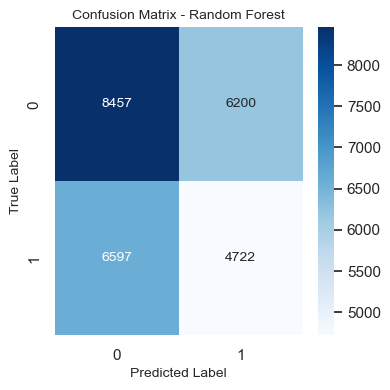

In [218]:
# Display confusion matrix
rf_cm = confusion_matrix(y_test, y_test_pred_rf)

# Plot the confusion matrix
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Model Comparison

### Using Hypertuned Training and Testing Accuracy

| Algorithm | Training Accuracy | Testing Accuracy |
| :-: | :-: | :-: |
| Logistic Regression | 87.42% | 87.68% |
| Support Vector Classifier | 94.52% | 94.27% |
| Decision Tree | 94.41% | 94.06% |
| Random Forest | 100.0% | 96.28% |

### Using ROC AUC Score

| Algorithm | ROC AUC Score |
| :-: | :-: |
| Logistic Regression | 0.87 | 
| Support Vector Classifier | 0.94 | 
| Decision Tree | 0.94 | 
| Random Forest | 0.96 |

In model comparison, we can observe that based on the analysis conducted using logistic regression, Support Vector Classifier (SVC), Decision tree and Random Forest algorithms for Satisfaction of Airline Passengers, it has been observed that Random Forest achieved the highest accuracy in terms of Training and testing accuracy as well as ROC AUC Score among these models.Therefore, Random Forest algorithm appears to be the most suitable model for predicting satifaction of airline passengers.

## Deploying Web App

Since Random forest algorithm appears to be the most suitable model for predicting satifaction of airline passengers, we will deploy web app based on Random Forest algorithm.

In [59]:
# print the unique values for our categorical values
df_new = df



In [67]:
x = df_new.drop(['satisfaction'], axis = 1)
y = df_new['satisfaction']
x.columns

Index(['Gender', 'customer_type', 'age', 'type_of_travel', 'customer_class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')

In [61]:
df_new.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,food_and_drink,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,5,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,1,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,5,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,2,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,4,...,3,3,4,4,3,3,3,0,0.0,1


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0) 

In [64]:
from sklearn.ensemble import RandomForestClassifier

# instantiate our model
forest = RandomForestClassifier(random_state = 42)

# fit our model
forest.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

#### Testcase1 - check for passenger not satisfied

In [68]:
import numpy as np


input_data = [0,0,25,0,0,562,2,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0]
# changing the input_data list into numpy array
input_data_as_numpy_array = np.array(input_data)

# reshape the array into 1 row and all columns-type,  as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = forest.predict(input_data_reshaped)
print(prediction[0])

if (prediction[0] == 0):
  print('Passenger is neutral/dissatsified')
else:
  print('Passenger is satisfied')

0
Passenger is neutral/dissatsified


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### Testcase2 - check for passenger is satisfied

In [69]:
input_data = [0,0,26,0,0,1142,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0]

input_data_as_numpy_array = np.array(input_data)

# reshape the array into 1 row and all columns-type,  as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = forest.predict(input_data_reshaped)
print(prediction[0])

if (prediction[0] == 0):
  print('Passenger is neutral/dissatsified')
else:
  print('Passenger is satisfied')

1
Passenger is satisfied


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [70]:
import pickle

pickle.dump(forest, open(r'C:\\Users\\DELL\\Desktop\\Sanjana\\itvedant\\ML_Project\\rf_model1.sav','wb'))